# Building a YOLOv3 cotton Object Detector with Darknet 

## Step 1.Mount google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Step 2: Moving Your Custom Dataset Into drive
upload the labelled data in the form of Zip file and unzip the file in google drive


In [ ]:
!unzip '/content/drive/My Drive/yolo_custom_model_training/custom_data.zip' -d '/content/drive/My Drive/yolo_custom_model_training'

Archive:  /content/drive/My Drive/yolo_custom_model_training/custom_data.zip
replace /content/drive/My Drive/yolo_custom_model_training/custom_data/0 (2100).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Step 3: Cloning and Building Darknet

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/My Drive/yolo_custom_model_training/darknet'

fatal: destination path '/content/drive/My Drive/yolo_custom_model_training/darknet' already exists and is not an empty directory.


In [ ]:
%cd '/content/drive/My Drive/yolo_custom_model_training/darknet'

/content/drive/My Drive/yolo_custom_model_training/darknet


check where all the required files are present or not

In [ ]:
!ls

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       video_yolov3.sh
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov4.sh
cfg		data			net_cam_v4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md


# Step 4 **Now we make changes to MAKEFILE

As we are using Goolge Colab GPU, we make set GPU=1, cuDNN=1, and OPENCV=1. 
For this we just need to execute the below command!!.

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
!make

chmod +x *.sh


In [ ]:
%cd '/content/drive/My Drive/yolo_custom_model_training'

/content/drive/My Drive/yolo_custom_model_training


# Step 5.Download pre-trained YOLOv4 weights
YOLOv4 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv4 on these pretrained classes and get detections.
or You can we can manually upload them in drive by downloading separatly

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Step 6: Configuring Files for Training and testing 
##i) Cfg File
1. Set max_batches,classes,filters as per requirement
## ii) obj.names and labelled_data.data 
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.
and labelled_data.data can be created by running creating-files-data-and-name.py file and it contains informations about all the folders and files
## iii) Generating train.txt and test.txt files 
This can be created by running creating-train-and-test-txt-files.py


In [ ]:
!python custom_data/creating-files-data-and-name.py

In [ ]:
!python custom_data/creating-train-and-test-txt-files.py

In [ ]:
!darknet/darknet

usage: darknet/darknet <function>


In [ ]:
%cd '/content/drive/My Drive/yolo_custom_model_training'

/content/drive/My Drive/yolo_custom_model_training


## Step 7.Train the data using the following command

In [ ]:
#!./darknet detector train /content/object-detection/trainer.data /content/object-detection/yolov3-tiny.cfg /content/object-detection/darknet53.conv.74 -dont_show 
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg custom_weight/darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.896272, GIOU: 0.894830), Class: 0.999636, Obj: 0.975138, No Obj: 0.002756, .5R: 1.000000, .75R: 1.000000, count: 18, class_loss = 0.072638, iou_loss = 0.305387, total_loss = 0.378025 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.664250, GIOU: 0.650891), Class: 0.999040, Obj: 0.279176, No Obj: 0.000032, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.305647, iou_loss = 0.088067, total_loss = 0.393714 
 total_bbox = 852843, rewritten_bbox = 0.000352 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.799201, GIOU: 0.792425), Class: 0.998000, Obj: 0.714906, No Obj: 0.001503, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 0.098591, iou_loss = 0.056435, total_loss = 0.155026 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.859081, GIOU: 0.856122), Class: 0.999092, Obj: 0.914853, No Obj

## you can continue training the data using weights saved in backup folder if connection is interrupted 

In [ ]:
#!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg custom_weight/darknet53.conv.74 -dont_show -map
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights -dont_show 

Streaming output truncated to the last 5000 lines.
 total_bbox = 2148573, rewritten_bbox = 0.000140 % 

 5926: 0.135602, 0.120049 avg loss, 0.000010 rate, 10.713275 seconds, 379264 images, 0.345699 hours left
Loaded: 0.000081 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000685, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.925197, GIOU: 0.924196), Class: 0.999969, Obj: 0.999671, No Obj: 0.003059, .5R: 1.000000, .75R: 1.000000, count: 26, class_loss = 0.000008, iou_loss = 0.100299, total_loss = 0.100307 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.895988, GIOU: 0.895957), Class: 0.999995, Obj: 0.999987, No Obj: 0.000068, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 0.000000, iou_loss = 0.017420, total_loss = 0.017420 
 t

# Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your colab drive.

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Step 8.calculate the mAP (mean Average Precision) of the model

In [ ]:
!darknet/darknet detector map custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolo_custom_model_training/backup/yolov3_custom_best.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

## we can check the avg loss using chart 

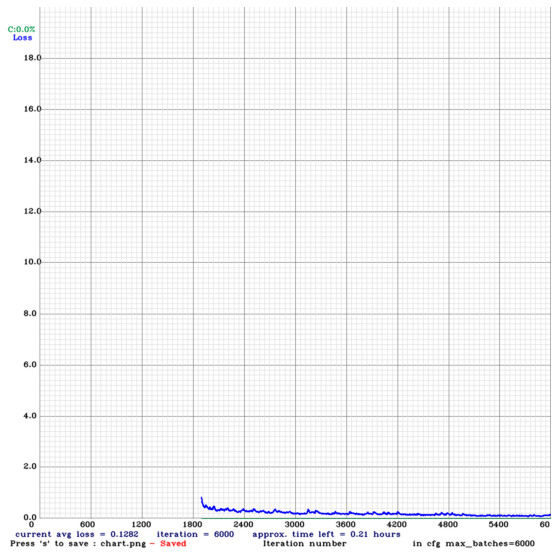

In [ ]:
imShow('chart.png')

## Step 9.Test the model using test images using best weights present in backup

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat

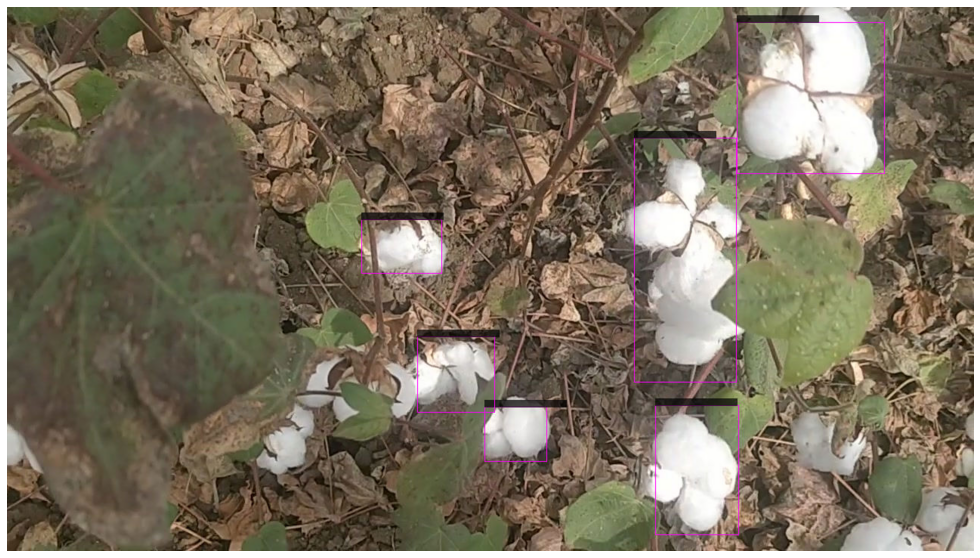

In [ ]:

!darknet/darknet detector test custom_data/labelled_data.data darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolo_custom_model_training/backup/yolov3_custom_best.weights /content/drive/MyDrive/test1.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
  !nvidia-smi